In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

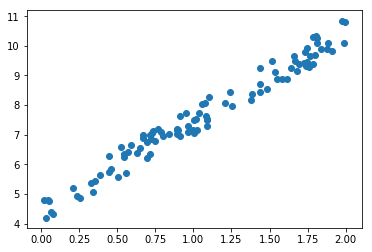

In [3]:
plt.scatter(X, y)

In [ ]:
## Normal Equation

In [4]:
X_b = np.c_[np.ones(X.shape), X]
# theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
# theta_best

$P_{r,c} = \sum_{k=1}^n{Q_{r,k} \times R_{k,c}}$

where;

$P$ = dot

$Q$ = X_b.T

$R$ = X_b

In [5]:
dot = np.zeros((X_b.T.shape[0], X_b.shape[1]))

for r in range(dot.shape[0]):
    for c in range(dot.shape[1]):
        sm = 0
        for k in range(X_b.shape[0]):
            sm += X_b.T[r,k] * X_b[k,c]
        dot[r, c] = sm


In [6]:
invd = np.linalg.inv(dot)

dot2 = np.zeros((invd.shape[0], X_b.T.shape[1]))

for r in range(dot2.shape[0]):
    for c in range(dot2.shape[1]):
        sm = 0
        for k in range(X_b.T.shape[0]):
            sm += invd[r,k] * X_b.T[k,c]
        dot2[r, c] = sm

theta_best = np.zeros((dot2.shape[0], y.shape[1]))

for r in range(theta_best.shape[0]):
    for c in range(theta_best.shape[1]):
        sm = 0
        for k in range(y.shape[0]):
            sm += dot2[r,k] * y[k,c]
        theta_best[r, c] = sm
        
theta_best

array([[ 4.51496335],
       [ 2.95322899]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]

# y_pred = X_new_b @ theta_best

y_pred = np.zeros((X_new_b.shape[0], theta_best.shape[1]))

for r in range(y_pred.shape[0]):
    for c in range(y_pred.shape[1]):
        sm = 0
        for k in range(theta_best.shape[0]):
            sm += X_new_b[r,k] * theta_best[k,c]
        y_pred[r, c] = sm

y_pred

array([[  4.51496335],
       [ 10.42142133]])

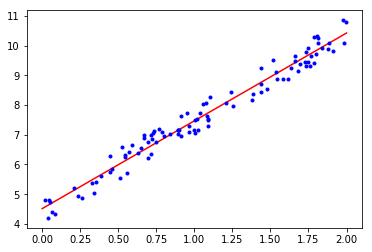

In [8]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.show()

In [ ]:
## Batch Gradient Descent

In [11]:
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [10]:
eta = 0.1
n_iter = 1000
m = 100

theta = np.random.randn(2,1)

for i in range(n_iter):
    gradients = 2/m * X_b.T @ ((X_b @ theta) - y)
    theta = theta - eta * gradients
    
theta

array([[ 4.51496335],
       [ 2.95322899]])

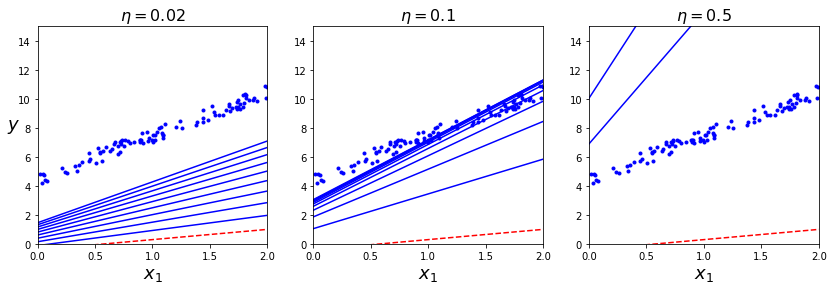

In [17]:
theta_path_bgd = []

np.random.seed(29)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(14,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [ ]:
## Stochastic Gradient Descent

In [36]:
n_epoch = 50
m = len(X_b)
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epoch):
    for i in range(m):
        randi = np.random.randint(m)
        xi = X_b[randi:randi+1]
        yi = y[randi:randi+1]
        gradients = 2 * xi.T @ ((xi @ theta) - yi) # what is this calculation?
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[ 4.50682537],
       [ 2.96671826]])

In [48]:
X_new = np.array([[1]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]

y_pred = X_new_b @ theta

y_pred # the sum of x_new_b[0] * theta[0,0] * theta[1,0]

pred = np.zeros((X_new_b.shape[0], theta.shape[1]))

for r in range(pred.shape[0]):
    for c in range(pred.shape[1]):
        sm = 0
        for k in range(theta.shape[0]):
            sm += X_new_b[r,k] * theta[k,c]
        pred[r, c] = sm

pred

array([[ 7.47354363]])